## 빅데이터 활용 AI 설계
# 단어 임베딩 : Imdb 적용
- word2vec 알고리즘에 해당함
- 한 단어는 단어집의 갯수만큼의 차원을 가진다. (원핫인코딩 형태)
- 이렇게 각 단어의 큰 차원을 줄여주는 것이 단어 임베딩이다.
- 단어 임베딩은 학습을 통해 얻을 수 있다.

<img src='embedding.jpg' />
(출처: http://th-mayer.de/pycon2018/#/6)

In [2]:
import numpy as np
import matplotlib.pyplot as plt

### Imdb 불러오기

In [3]:
from keras.datasets import imdb

C:\Anaconda3\envs\py36\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [4]:
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=10000) # 가장 빈도가 높은 만개의 단어만 추출
    # C:\Users\사용자아이디\.keras\datasets\imdb.npz 에 저장됨

In [7]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((25000,), (25000,), (25000,), (25000,))

In [8]:
print(X_train[0]) # 단어들의 인덱스임 (0~9999 인 단어만 있음)

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [11]:
len_x = [len(i) for i in X_train]

In [12]:
max(len_x), min(len_x)

(2494, 11)

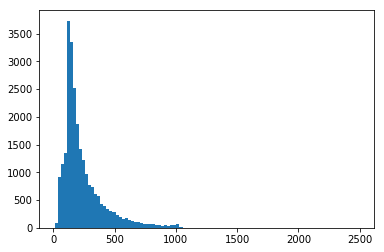

In [14]:
plt.hist(len_x, bins=100)
pass

- X_train 은 array 이지만, 각 항목은 리스트이다.

In [11]:
max([max(l) for l in X_train])

9999

In [12]:
min([min(l) for l in X_train])

1

In [13]:
y_train

array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

In [15]:
np.bincount(y_train)

array([12500, 12500], dtype=int64)

- 단어사전 얻기(단어, 인덱스)
- C:\Users\사용자아이디\.keras\datasets\imdb_word_index.json
- X_train 의 인덱스 값에서 3을 빼줘야 word_index 의 인덱스 값에 해당함

In [16]:
word_index = imdb.get_word_index()

In [17]:
len(word_index)

88584

In [ ]:
word_index.items()

In [16]:
n = 0
for k in word_index:
    print(k, word_index[k])
    n += 1
    if n>=5: break

fawn 34701
tsukino 52006
nunnery 52007
sonja 16816
vani 63951


In [25]:
for i in range(9999,9990,-1):
    for k in word_index:
        if word_index[k]==i:
            print(i, k)

9999 beaver
9998 shenanigans
9997 retains
9996 edged
9995 retrospect
9994 grail
9993 unfairly
9992 soulless
9991 grabbing


### 각 문장의 단어를 20개로 제한

In [22]:
from keras import preprocessing

In [23]:
preprocessing.sequence.pad_sequences([[1,2,3],[4,5,6],[1,2,3,4,5,6,7,8,9,10]], maxlen=5)

array([[ 0,  0,  1,  2,  3],
       [ 0,  0,  4,  5,  6],
       [ 6,  7,  8,  9, 10]])

In [24]:
X_train = preprocessing.sequence.pad_sequences(X_train, maxlen=20)
X_test = preprocessing.sequence.pad_sequences(X_test, maxlen=20)

In [25]:
print(X_train.shape)
print(X_train[0]) # 뒷부분만 남긴다 (20단어 보다 작은 경우 앞에 0을 채운다)

(25000, 20)
[  65   16   38 1334   88   12   16  283    5   16 4472  113  103   32
   15   16 5345   19  178   32]


### 정리
- X_train 은 총 25,000개의 문장(Sequence) 이다.
- 한 문장(Sequence)는 20개의 단어로 이루어져 있다.
- 각 단어에 해당하는 번호는 0~9999 로 총 1만개로 이루어져 있다.
- 단어 번호(인덱스)가 정수 하나이지만 실제로는 1만개의 성분인 원핫인코딩 벡터로 생각해야 한다.
- (25000, 20, 10000)

### Keras 의 Embedding 적용

In [26]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

In [27]:
model = Sequential()
model.add(Embedding(10000, 8, input_length=20)) # 샘플당 단어 20개가 들어옴. 단어의 인덱스는 0~9999
    # 단어의 차원이 10000 에서 8로 줄어듬. 출력 차원은 (None, 20, 8) => 희소벡터를 밀집벡터로 변환
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

- Embedding 은 단어인덱스의 열(Sequence)를 입력받아 각 단어들을 줄어든 차원의 벡터로 출력한다 (word2vec)

In [28]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 20, 8)             80000     
_________________________________________________________________
flatten_1 (Flatten)          (None, 160)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 161       
Total params: 80,161
Trainable params: 80,161
Non-trainable params: 0
_________________________________________________________________


In [29]:
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['acc'])
model.fit(X_train, y_train, batch_size=32, epochs=10, validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 5s 265us/step - loss: 0.6759 - acc: 0.6049 - val_loss: 0.6398 - val_acc: 0.6810
Epoch 2/10
20000/20000 [==============================] - 4s 218us/step - loss: 0.5658 - acc: 0.7427 - val_loss: 0.5467 - val_acc: 0.7204
Epoch 3/10
20000/20000 [==============================] - 5s 226us/step - loss: 0.4752 - acc: 0.7808 - val_loss: 0.5113 - val_acc: 0.7384
Epoch 4/10
20000/20000 [==============================] - 5s 231us/step - loss: 0.4263 - acc: 0.8077 - val_loss: 0.5008 - val_acc: 0.7454
Epoch 5/10
20000/20000 [==============================] - 4s 223us/step - loss: 0.3930 - acc: 0.8258 - val_loss: 0.4981 - val_acc: 0.7536
Epoch 6/10
20000/20000 [==============================] - 5s 231us/step - loss: 0.3668 - acc: 0.8395 - val_loss: 0.5014 - val_acc: 0.7530
Epoch 7/10
20000/20000 [==============================] - 4s 223us/step - loss: 0.3435 - acc: 0.8533 - val_loss: 0.5052 - v

- 단어를 20개로 제한한 것을 감안하면 좋은 결과이다!

### 가중치 분석

In [30]:
ws = model.get_weights()

In [31]:
ws[0].shape # 단어 만개에 대한 가중치 (또는 특성 벡터)

(10000, 8)

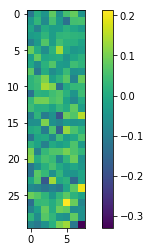

In [32]:
plt.imshow(ws[0][:30])
plt.colorbar()

- 비슷한 패턴의 행들에 해당하는 단어들은 문장에서 같이 등장할 가능성이 크다.

In [33]:
for w in word_index:
    if word_index[w]==16-3: # 14: this, 16: was
        print(w)
        break

was


In [66]:
mat = ws[0]
n = word_index['excellent'] + 3

distance = []

for i in range(10000):
    distance.append(((mat[n]-mat[i])**2).sum())
    
np.argsort(distance)[:10]

array([ 321,  545,  404, 1301,  447,  514, 1739,  389,  833,  483],
      dtype=int64)

In [71]:
for w in word_index:
    if word_index[w]==447-3:
        print(w)
        break
# movie, highly, perfect, touching, loved ...

loved


### GloVe 적용
- glove 는 스탠포드 대학교에서 만든 2014년 영문 위키피디아를 사용하여 사전에 계산한 임베딩임
- 구글의 Word2vec 와 함께 인기가 많다
- https://nlp.stanford.edu/projects/glove
- https://bit.ly/2NIJwdb 에서 glove.6B.zip 다운로드 (이 중 glove.6B.100d.txt 사용)
- 단어 40만개, 100차원

In [69]:
f = open('glove.6B.100d.txt', encoding='utf8')
s = f.readline()
s2 = f.readline()
f.close()

In [70]:
s

'the -0.038194 -0.24487 0.72812 -0.39961 0.083172 0.043953 -0.39141 0.3344 -0.57545 0.087459 0.28787 -0.06731 0.30906 -0.26384 -0.13231 -0.20757 0.33395 -0.33848 -0.31743 -0.48336 0.1464 -0.37304 0.34577 0.052041 0.44946 -0.46971 0.02628 -0.54155 -0.15518 -0.14107 -0.039722 0.28277 0.14393 0.23464 -0.31021 0.086173 0.20397 0.52624 0.17164 -0.082378 -0.71787 -0.41531 0.20335 -0.12763 0.41367 0.55187 0.57908 -0.33477 -0.36559 -0.54857 -0.062892 0.26584 0.30205 0.99775 -0.80481 -3.0243 0.01254 -0.36942 2.2167 0.72201 -0.24978 0.92136 0.034514 0.46745 1.1079 -0.19358 -0.074575 0.23353 -0.052062 -0.22044 0.057162 -0.15806 -0.30798 -0.41625 0.37972 0.15006 -0.53212 -0.2055 -1.2526 0.071624 0.70565 0.49744 -0.42063 0.26148 -1.538 -0.30223 -0.073438 -0.28312 0.37104 -0.25217 0.016215 -0.017099 -0.38984 0.87424 -0.72569 -0.51058 -0.52028 -0.1459 0.8278 0.27062\n'

In [71]:
len(s.strip().split()) # 단어와 100 차원의 벡터 값

101

In [72]:
n = 0

f = open('glove.6B.100d.txt', encoding='utf8')
for line in f:
    n += 1
f.close()

n # 40만 개의 단어

400000

In [73]:
word_index = imdb.get_word_index()
len(word_index)

88584